In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

Reading data set

In [2]:
df = pd.read_csv("pwr_cell_dataset_clean_3k.csv")

In [3]:
df

,Enrichment,FuelT,WaterT,Pitch,FuelR,WaterD,FuelD,Keff,Std_dev
0,24.430910,664.782614,567.925325,1.642314,0.714294,0.976810,9.600968,1.507987,0.000323
1,82.280322,1363.900826,501.600781,1.379222,0.370878,0.697496,10.205289,1.746744,0.000264
2,19.167943,1460.183440,334.792231,1.906882,0.695364,0.877380,10.258945,1.541072,0.000356
3,20.088497,1175.168704,493.911830,0.735232,0.225556,0.830257,10.246023,1.515049,0.000410
4,86.675023,1237.672361,597.014917,1.158495,0.221872,0.905299,10.250478,1.802780,0.000263
...,...,...,...,...,...,...,...,...,...
2698,77.364460,587.946109,350.375222,0.879498,0.358961,0.809106,10.340870,1.832681,0.000221
2699,28.614898,928.516622,316.549909,1.521848,0.420101,0.785937,9.639033,1.671429,0.000353
2700,12.675710,554.424395,489.148266,1.269696,0.526585,0.652849,9.690261,1.328700,0.000387
2701,55.231024,657.007493,582.701163,0.666839,0.226408,0.921731,9.861622,1.641267,0.000269


Short information about the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2703 entries, 0 to 2702
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Enrichment  2703 non-null   float64
 1   FuelT       2703 non-null   float64
 2   WaterT      2703 non-null   float64
 3   Pitch       2703 non-null   float64
 4   FuelR       2703 non-null   float64
 5   WaterD      2703 non-null   float64
 6   FuelD       2703 non-null   float64
 7   Keff        2703 non-null   float64
 8   Std_dev     2703 non-null   float64
dtypes: float64(9)
memory usage: 190.2 KB


Some statistics

In [5]:
df.describe()

,Enrichment,FuelT,WaterT,Pitch,FuelR,WaterD,FuelD,Keff,Std_dev
count,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000
mean,45.368827,1121.681313,439.081266,1.290129,0.382388,0.804533,9.997916,1.636058,0.000307
std,25.932962,388.610045,97.794341,0.403002,0.155326,0.112651,0.291059,0.166917,0.000056
min,0.701673,288.603154,274.110729,0.600455,0.200001,0.610116,9.500037,0.626834,0.000170
25%,22.521960,791.021642,354.243819,0.949844,0.254298,0.708377,9.738932,1.574372,0.000265
50%,45.490206,1131.192864,438.200578,1.272138,0.337028,0.805054,10.005001,1.686159,0.000300
75%,67.507247,1449.502605,523.556560,1.636711,0.476663,0.902369,10.245833,1.749950,0.000343
max,89.920130,1799.958886,609.813585,1.999883,0.907305,0.999883,10.499938,1.952352,0.000487


In [6]:
df.head()

,Enrichment,FuelT,WaterT,Pitch,FuelR,WaterD,FuelD,Keff,Std_dev
0,24.430910,664.782614,567.925325,1.642314,0.714294,0.976810,9.600968,1.507987,0.000323
1,82.280322,1363.900826,501.600781,1.379222,0.370878,0.697496,10.205289,1.746744,0.000264
2,19.167943,1460.183440,334.792231,1.906882,0.695364,0.877380,10.258945,1.541072,0.000356
3,20.088497,1175.168704,493.911830,0.735232,0.225556,0.830257,10.246023,1.515049,0.000410
4,86.675023,1237.672361,597.014917,1.158495,0.221872,0.905299,10.250478,1.802780,0.000263


Extraction of features and lables from the data set

In [7]:
features = df.drop(['Keff', 'Std_dev'], axis=1)
labels = df['Keff']

In [8]:
features

,Enrichment,FuelT,WaterT,Pitch,FuelR,WaterD,FuelD
0,24.430910,664.782614,567.925325,1.642314,0.714294,0.976810,9.600968
1,82.280322,1363.900826,501.600781,1.379222,0.370878,0.697496,10.205289
2,19.167943,1460.183440,334.792231,1.906882,0.695364,0.877380,10.258945
3,20.088497,1175.168704,493.911830,0.735232,0.225556,0.830257,10.246023
4,86.675023,1237.672361,597.014917,1.158495,0.221872,0.905299,10.250478
...,...,...,...,...,...,...,...
2698,77.364460,587.946109,350.375222,0.879498,0.358961,0.809106,10.340870
2699,28.614898,928.516622,316.549909,1.521848,0.420101,0.785937,9.639033
2700,12.675710,554.424395,489.148266,1.269696,0.526585,0.652849,9.690261
2701,55.231024,657.007493,582.701163,0.666839,0.226408,0.921731,9.861622


In [9]:
labels

0       1.507987
1       1.746744
2       1.541072
3       1.515049
4       1.802780
          ...   
2698    1.832681
2699    1.671429
2700    1.328700
2701    1.641267
2702    1.675785
Name: Keff, Length: 2703, dtype: float64

Splitting the data set on training and validation data set. We are using training data set for training our model and validation data set for final conclusion on the accuracy of the model.

In [10]:
x_train, x_val, y_train, y_val = train_test_split(features, labels, test_size=0.2)

In [11]:
x_train

,Enrichment,FuelT,WaterT,Pitch,FuelR,WaterD,FuelD
2282,82.810092,1459.877123,368.465035,1.807386,0.340127,0.816789,9.924448
1757,76.020315,1649.466550,282.700324,1.391354,0.442863,0.627570,9.788424
1161,79.389829,572.344604,346.041146,1.783535,0.533320,0.974092,9.535983
1314,47.463781,1644.799945,348.535316,0.674035,0.247692,0.809293,9.804986
1088,30.148687,1425.548714,413.276581,0.600455,0.208783,0.660302,9.680906
...,...,...,...,...,...,...,...
2299,79.878631,1218.288742,585.801693,1.226976,0.514636,0.652441,9.657628
522,58.826745,877.825794,526.962878,1.284233,0.208599,0.660078,10.202295
1664,29.455036,1732.405984,396.159647,1.722472,0.456321,0.637148,10.437192
1368,37.794753,923.888744,409.822037,1.486550,0.644276,0.851950,10.303713


In [12]:
y_train

2282    1.798363
1757    1.728843
1161    1.778479
1314    1.599539
1088    1.468137
          ...   
2299    1.856498
522     1.787179
1664    1.646130
1368    1.606794
590     1.737817
Name: Keff, Length: 2162, dtype: float64

In [13]:
x_val

,Enrichment,FuelT,WaterT,Pitch,FuelR,WaterD,FuelD
882,82.615131,1353.311343,507.487305,1.456090,0.399919,0.678665,10.115620
1401,70.179255,663.690476,284.871114,1.453152,0.373774,0.916626,9.537794
1897,30.695686,1718.021667,533.516355,0.655350,0.202083,0.687643,10.109198
2595,30.051224,1219.762208,357.510131,1.895985,0.697868,0.804108,9.839416
2475,73.072034,1178.836124,284.324131,0.710387,0.219032,0.669909,10.444335
...,...,...,...,...,...,...,...
2000,84.468566,909.232079,457.824367,0.957119,0.203713,0.632561,9.566078
605,40.412754,1762.306081,424.780991,1.994455,0.443370,0.757240,10.194346
2273,20.428703,1293.130101,356.895041,1.139796,0.337750,0.688161,9.553896
565,83.646345,523.605248,276.090847,1.833420,0.387456,0.745917,9.518478


In [14]:
y_val

882     1.749465
1401    1.765635
1897    1.503651
2595    1.583749
2475    1.696868
          ...   
2000    1.753754
605     1.736966
2273    1.564989
565     1.802880
4       1.802780
Name: Keff, Length: 541, dtype: float64

Creating ANN model using MLPRegressor class

In [15]:
model = MLPRegressor(hidden_layer_sizes=(150,100,50,),
                     activation='logistic',
                     batch_size=100,
                     learning_rate='constant',
                     learning_rate_init=0.0001,
                     early_stopping=True,
                     tol=1e-6,
                     verbose=True, 
                     n_iter_no_change=50, 
                     max_iter=500)

Training the model

In [16]:
X = x_train
y = y_train
model.fit(X, y)

Iteration 1, loss = 1.41430600
Validation score: -77.367538
Iteration 2, loss = 1.07139406
Validation score: -57.220671
Iteration 3, loss = 0.78815600
Validation score: -40.982009
Iteration 4, loss = 0.56173970
Validation score: -28.141176
Iteration 5, loss = 0.38513217
Validation score: -18.361979
Iteration 6, loss = 0.25204647
Validation score: -11.245806
Iteration 7, loss = 0.15720072
Validation score: -6.392330
Iteration 8, loss = 0.09526828
Validation score: -3.434185
Iteration 9, loss = 0.05829583
Validation score: -1.761514
Iteration 10, loss = 0.03710383
Validation score: -0.849677
Iteration 11, loss = 0.02554928
Validation score: -0.373454
Iteration 12, loss = 0.01942652
Validation score: -0.143541
Iteration 13, loss = 0.01631089
Validation score: -0.037370
Iteration 14, loss = 0.01473054
Validation score: 0.006035
Iteration 15, loss = 0.01399958
Validation score: 0.026034
Iteration 16, loss = 0.01354718
Validation score: 0.037502
Iteration 17, loss = 0.01324325
Validation sco

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='logistic', batch_size=100, early_stopping=True,
             hidden_layer_sizes=(150, 100, 50), learning_rate_init=0.0001,
             max_iter=500, n_iter_no_change=50, tol=1e-06, verbose=True)

The value of the loss at the final step

In [17]:
model.loss_

0.001946001922103628

Plotting loss via iterations

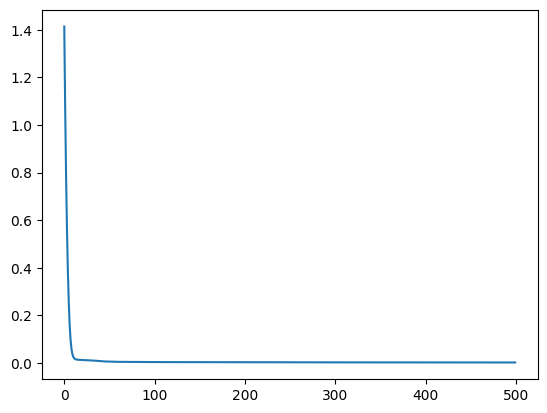

In [18]:
plt.plot(model.loss_curve_)

In [19]:
x_val

,Enrichment,FuelT,WaterT,Pitch,FuelR,WaterD,FuelD
882,82.615131,1353.311343,507.487305,1.456090,0.399919,0.678665,10.115620
1401,70.179255,663.690476,284.871114,1.453152,0.373774,0.916626,9.537794
1897,30.695686,1718.021667,533.516355,0.655350,0.202083,0.687643,10.109198
2595,30.051224,1219.762208,357.510131,1.895985,0.697868,0.804108,9.839416
2475,73.072034,1178.836124,284.324131,0.710387,0.219032,0.669909,10.444335
...,...,...,...,...,...,...,...
2000,84.468566,909.232079,457.824367,0.957119,0.203713,0.632561,9.566078
605,40.412754,1762.306081,424.780991,1.994455,0.443370,0.757240,10.194346
2273,20.428703,1293.130101,356.895041,1.139796,0.337750,0.688161,9.553896
565,83.646345,523.605248,276.090847,1.833420,0.387456,0.745917,9.518478


Using the model to predict Keff from the validation data set

In [20]:
y_predict = model.predict(x_val.values)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


In [21]:
y_predict

array([1.78338249, 1.77363076, 1.55125688, 1.64854673, 1.72438813,
       1.76241332, 1.81364077, 1.73948426, 1.52210724, 1.70814907,
       1.61433381, 1.59353435, 1.63024918, 1.59015052, 1.77180622,
       1.72768353, 1.66075872, 1.73019073, 1.70084826, 1.56328313,
       1.55949828, 1.70372061, 1.76209297, 1.79998417, 1.59502719,
       1.57407468, 1.77372944, 1.59172788, 1.69676923, 1.61566305,
       1.55956692, 1.49310996, 1.6822315 , 1.66142266, 1.66986209,
       1.65770969, 1.74843575, 1.81640004, 1.73140413, 1.5635432 ,
       1.72532615, 1.1745648 , 1.67481501, 1.4075853 , 1.80803369,
       1.22325905, 1.51843695, 1.53853136, 1.70886603, 1.57471954,
       1.63500386, 1.59794843, 1.77644509, 1.76326723, 1.73627795,
       1.79523205, 1.52507621, 1.81850426, 1.55787161, 1.56036538,
       1.75967493, 1.76980738, 1.77461583, 1.70892502, 1.54053098,
       1.59632036, 1.69762696, 1.55584565, 1.64718593, 1.56877391,
       1.72658519, 1.80747722, 1.72941051, 1.68020824, 1.54641

In [22]:
y_val.values

array([1.74946472, 1.76563461, 1.50365109, 1.58374876, 1.6968677 ,
       1.76548956, 1.8022357 , 1.7026136 , 1.53265244, 1.77220529,
       1.56910685, 1.68400458, 1.64427162, 1.60725714, 1.72827338,
       1.72392992, 1.69100826, 1.75080487, 1.73979289, 1.60075371,
       1.46810393, 1.67124993, 1.72323868, 1.78327021, 1.67186459,
       1.44288348, 1.79957635, 1.54839502, 1.66862597, 1.59174917,
       1.68270666, 1.40278751, 1.69149934, 1.66344242, 1.66986154,
       1.65581026, 1.72386827, 1.79710823, 1.76622776, 1.55266737,
       1.72883001, 1.32412412, 1.63346041, 1.49193369, 1.77371516,
       1.13872748, 1.38383832, 1.45584078, 1.67694373, 1.53530791,
       1.73162176, 1.54182815, 1.74169613, 1.76756473, 1.76106033,
       1.78334257, 1.50649825, 1.79580393, 1.55531026, 1.53698276,
       1.74888025, 1.80329398, 1.75972835, 1.7033097 , 1.4688454 ,
       1.57421691, 1.7565779 , 1.50855008, 1.6030718 , 1.51710159,
       1.69801588, 1.78827937, 1.72956842, 1.687704  , 1.56121

Evaluating accuracy of the model on validation data set

In [23]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
r_squared = model.score(x_val.values, y_val.values)
rmse = np.sqrt(mean_squared_error(y_val.values, y_predict))
mae = mean_absolute_error(y_predict, y_val.values)
print("r_squared = ", r_squared)
print("RMSE = ", rmse)
print("MAE = ", mae)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


r_squared =  0.8504539493160012
RMSE =  0.06653922342210639
MAE =  0.04797171876684855
